# The classification problem

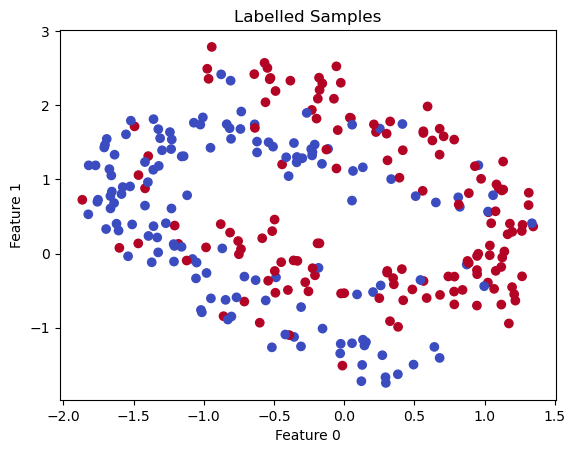

In [90]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_samples_per_class = 200

rotation_matrix = np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)], 
              [np.sin(np.pi / 4), np.cos(np.pi / 4)]])

X2d = np.vstack([
  np.column_stack([np.cos(np.linspace(0, 1.25 * np.pi, n_samples_per_class)), 2 * np.sin(np.linspace(0, 1.25 * np.pi, n_samples_per_class))]),
  np.column_stack([0.5 - np.cos(np.linspace(0, 1.25 * np.pi, n_samples_per_class)), 2 * (0.5 - np.sin(np.linspace(0, 1.25 * np.pi, n_samples_per_class)))])
])

np.random.seed(0)

X2d = X2d @ rotation_matrix.T + np.random.normal(0, 0.2, X2d.shape)
y2d = np.hstack([np.zeros(n_samples_per_class), np.ones(n_samples_per_class)])

X2d_train, X2d_test, y2d_train, y2d_test = train_test_split(X2d, y2d, test_size=0.3, random_state=0)

mislabeled_indices = np.random.choice(len(y2d_train), size=int(0.2 * n_samples_per_class), replace=False)
y2d_train[mislabeled_indices] = 1 - y2d_train[mislabeled_indices]

import matplotlib.pyplot as plt

plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.title('Labelled Samples')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/2dtrain.png')
plt.show()

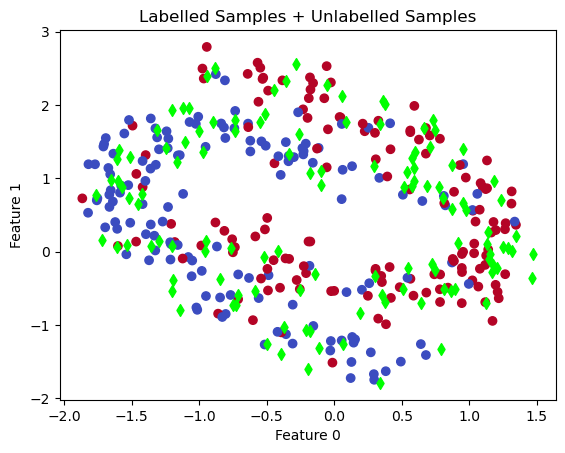

In [91]:
plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c='lime', marker='d')
plt.title('Labelled Samples + Unlabelled Samples')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/2dtrain_test.png')
plt.show()

# Visual prediction

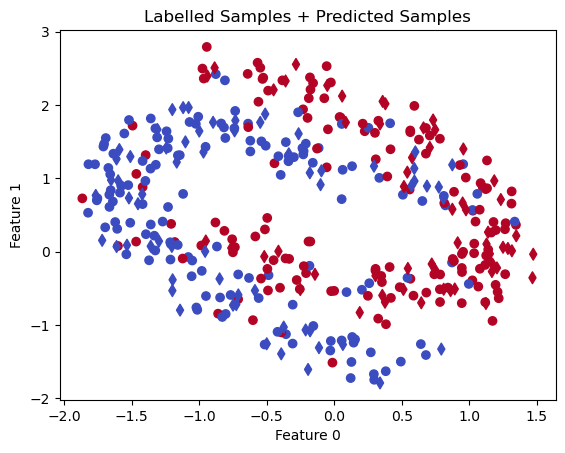

In [92]:
plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c=y2d_test, cmap='coolwarm', marker='d')
plt.title('Labelled Samples + Predicted Samples')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/2d_pred_visual.png')
plt.show()

# Higher dimensions

In [93]:
X4d, y4d = make_classification(n_samples=10, n_features=4, n_classes=2, n_informative=4, n_redundant=0, random_state=0)

X4d_test, y4d_test = X4d[0], y4d[0]
X4d_train, y4d_train = X4d[1:], y4d[1:]

import pandas as pd

df_train = pd.DataFrame(X4d_train, columns=['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3'])
df_train['Label'] = y4d_train
print(df_train.round(2))

print()

df_test = pd.DataFrame(X4d_test.reshape(1, -1), columns=['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3'])
df_test['Label'] = '?'
print(df_test.round(2))

df_train.to_csv('../results/4dtrain.csv', index=False)
df_test.to_csv('../results/4dtest.csv', index=False)

   Feature 0  Feature 1  Feature 2  Feature 3  Label
0       1.93      -1.71      -0.75      -1.15      0
1       1.70       1.63       1.44      -0.42      1
2      -2.45       0.64      -0.48       0.17      1
3       1.14      -0.56       0.46      -1.04      1
4      -0.72      -0.41       1.21      -2.49      0
5      -1.29      -1.58      -0.04      -2.11      0
6      -1.56      -1.13      -1.08       0.70      0
7       2.02      -0.14      -1.25      -1.96      1
8       1.37       0.01      -3.05       1.66      0

   Feature 0  Feature 1  Feature 2  Feature 3 Label
0      -1.12       0.43       -1.5       0.55     ?


# Compute distance

\begin{equation}
d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
\end{equation}

In [94]:
df_train['Distance'] = np.linalg.norm(df_train.iloc[:, :4].values - X4d_test, axis=1)
print(df_train.round(2))
df_train.to_csv('../results/4dtrain_dist.csv', index=False)

   Feature 0  Feature 1  Feature 2  Feature 3  Label  Distance
0       1.93      -1.71      -0.75      -1.15      0      4.18
1       1.70       1.63       1.44      -0.42      1      4.35
2      -2.45       0.64      -0.48       0.17      1      1.73
3       1.14      -0.56       0.46      -1.04      1      3.53
4      -0.72      -0.41       1.21      -2.49      0      4.18
5      -1.29      -1.58      -0.04      -2.11      0      3.65
6      -1.56      -1.13      -1.08       0.70      0      1.69
7       2.02      -0.14      -1.25      -1.96      1      4.07
8       1.37       0.01      -3.05       1.66      0      3.17


In [95]:
df_train['Rank'] = df_train['Distance'].rank(method='first').astype(int)
print(df_train.round(2))
df_train.to_csv('../results/4dtrain_sorted.csv', index=False)

   Feature 0  Feature 1  Feature 2  Feature 3  Label  Distance  Rank
0       1.93      -1.71      -0.75      -1.15      0      4.18     7
1       1.70       1.63       1.44      -0.42      1      4.35     9
2      -2.45       0.64      -0.48       0.17      1      1.73     2
3       1.14      -0.56       0.46      -1.04      1      3.53     4
4      -0.72      -0.41       1.21      -2.49      0      4.18     8
5      -1.29      -1.58      -0.04      -2.11      0      3.65     5
6      -1.56      -1.13      -1.08       0.70      0      1.69     1
7       2.02      -0.14      -1.25      -1.96      1      4.07     6
8       1.37       0.01      -3.05       1.66      0      3.17     3


In [96]:
df_test['Label'] = df_train.loc[df_train['Rank'] == 1, 'Label'].values[0]
print(df_test.round(2))
df_test.to_csv('../results/4dtest_pred.csv', index=False)

   Feature 0  Feature 1  Feature 2  Feature 3  Label
0      -1.12       0.43       -1.5       0.55      0


# Visualize Nearest Neighbour

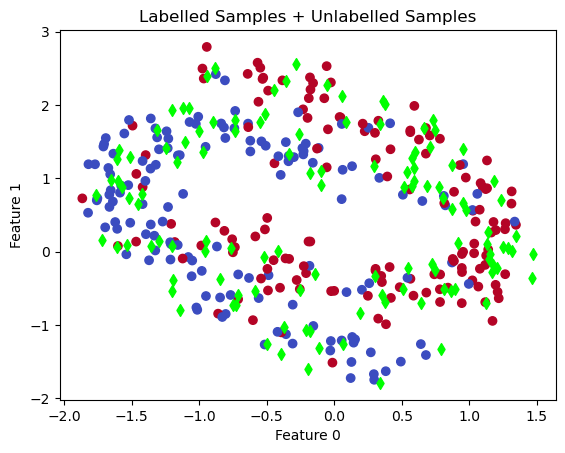

In [97]:
plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c='lime', marker='d')
plt.title('Labelled Samples + Unlabelled Samples')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

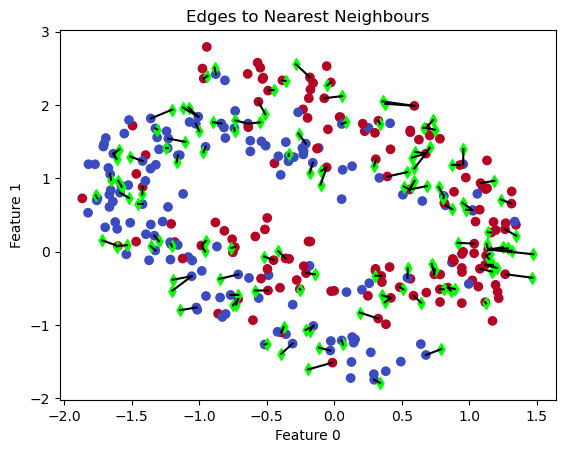

In [98]:
distances = np.linalg.norm(X2d_test[:, np.newaxis] - X2d_train, axis=2)

nearest_indices = np.argmin(distances, axis=1)

plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c='lime', marker='d')

for idx in range(len(X2d_test)):
  test_sample = X2d_test[idx]
  nearest_train_sample = X2d_train[nearest_indices[idx]]
  plt.plot([test_sample[0], nearest_train_sample[0]], [test_sample[1], nearest_train_sample[1]], 'k')

plt.title('Edges to Nearest Neighbours')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/2d_edges.png')
plt.show()

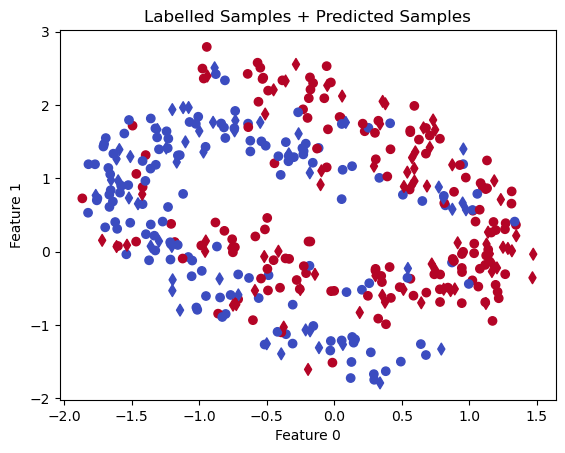

In [99]:
distances = np.linalg.norm(X2d_test[:, np.newaxis] - X2d_train, axis=2)

nearest_indices = np.argmin(distances, axis=1)

y2d_pred_nn = y2d_train[nearest_indices]

plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c=y2d_pred_nn, cmap='coolwarm', marker='d')
plt.title('Labelled Samples + Predicted Samples')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/2d_pred_nn.png')
plt.show()

# Decision boundary

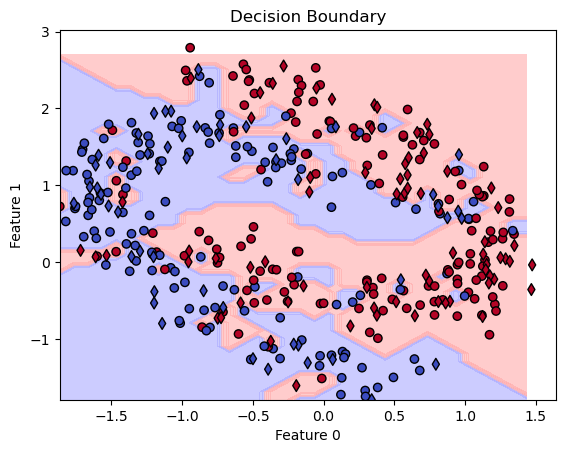

In [100]:
from matplotlib.colors import ListedColormap

x_min, x_max = X2d[:, 0].min(), X2d[:, 0].max()
y_min, y_max = X2d[:, 1].min(), X2d[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
           np.arange(y_min, y_max, 0.1))

grid_points = np.c_[xx.ravel(), yy.ravel()]
distances = np.linalg.norm(grid_points[:, np.newaxis] - X2d_train, axis=2)

nearest_indices = np.argmin(distances, axis=1)
grid_predictions_nn = y2d_train[nearest_indices].reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions_nn, alpha=0.6, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))
plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm', edgecolor='k')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c=y2d_pred_nn, cmap='coolwarm', marker='d', edgecolor='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/decision_boundary_nn.png')
plt.show()

# k-Nearest Neighbours

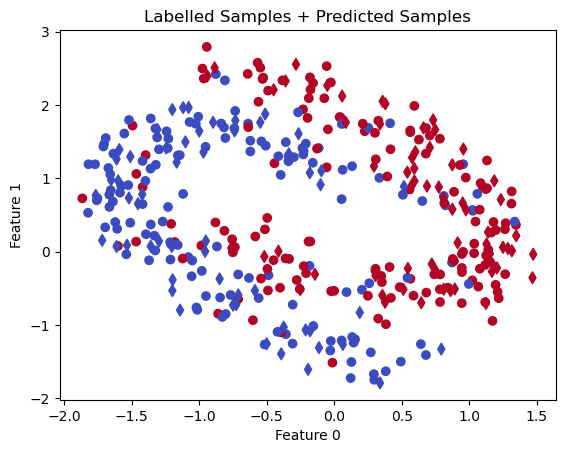

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X2d_train, y2d_train)
y2d_pred_knn = knn.predict(X2d_test)

plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c=y2d_pred_knn, cmap='coolwarm', marker='d')
plt.title('Labelled Samples + Predicted Samples')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/2d_pred_knn.png')
plt.show()

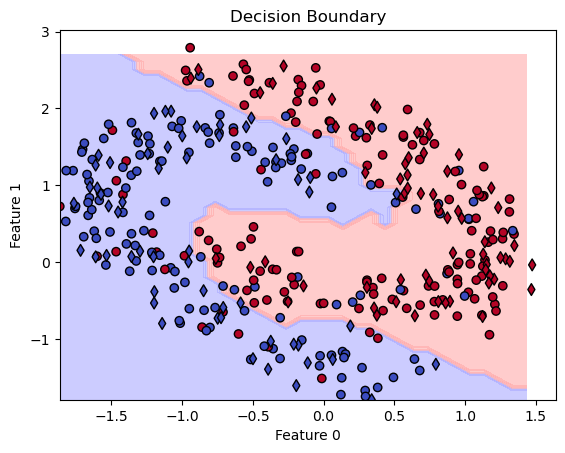

In [102]:
grid_predictions_knn = knn.predict(grid_points).reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions_knn, alpha=0.6, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))
plt.scatter(X2d_train[:, 0], X2d_train[:, 1], c=y2d_train, cmap='coolwarm', edgecolor='k')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c=y2d_pred_knn, cmap='coolwarm', marker='d', edgecolor='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('../results/decision_boundary_knn.png')
plt.show()

# Real data

In [103]:
from sklearn.model_selection import cross_val_score

url = (
  "https://raw.githubusercontent.com/jbrownlee/Datasets/"
  "master/pima-indians-diabetes.data.csv"
)
cols = [
  "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
  "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, header=None, names=cols)

features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for feat in features:
  df[feat] = df[feat].replace(0, np.nan)
  df[feat] = df[feat].fillna(df[feat].median())

X2d = df.drop("Outcome", axis=1).values
y2d = df["Outcome"].values
label_map = {0: "Non-Diabetic", 1: "Diabetic"}
y2d = np.vectorize(label_map.get)(y2d).reshape(-1, 1)


print("Pima Indians Diabetes Dataset:")
print(f"Number of features: {len(features)}")
print(f"Number of samples: {len(df)}")
print(f"Number of classes: {df['Outcome'].nunique()}")

knn_k1 = KNeighborsClassifier(n_neighbors=1)
scores_k1 = cross_val_score(knn_k1, X2d, y2d.ravel(), cv=10)
accuracy_k1 = scores_k1.mean()
std_k1 = scores_k1.std()

k = 20

knn_k20 = KNeighborsClassifier(n_neighbors=20)
scores_k20 = cross_val_score(knn_k20, X2d, y2d.ravel(), cv=10)
accuracy_k20 = scores_k20.mean()
std_k20 = scores_k20.std()

print()
print("Cross-Validation Results:")
print(f"k=1: Accuracy = {accuracy_k1:.2f}, Std Dev = {std_k1:.2f}")
print(f"k=10: Accuracy = {accuracy_k20:.2f}, Std Dev = {std_k20:.2f}")

dataset_metadata_df = pd.DataFrame({
  "Dataset": ["Pima Indians Diabetes"],
  "Features": [len(features)],
  "Samples": [len(df)],
  "Classes": [df["Outcome"].nunique()]
})
dataset_metadata_df.to_csv('../results/dataset_metadata.csv', index=False)

cross_val_results_df = pd.DataFrame({
  "k": [1, 20],
  "Accuracy": [accuracy_k1, accuracy_k20],
  "Standard Deviation": [std_k1, std_k20]
}).round(2)
cross_val_results_df.to_csv('../results/cross_val_results.csv', index=False)

Pima Indians Diabetes Dataset:
Number of features: 5
Number of samples: 768
Number of classes: 2

Cross-Validation Results:
k=1: Accuracy = 0.69, Std Dev = 0.05
k=10: Accuracy = 0.74, Std Dev = 0.05


# Thank you!